# Assignment 6
### Do Question 6, and three more questions of your choice.

### Names: Erin Siedlecki, Shaveen Saadee, Anna Li, Emily Garman, Razan Habboub, Marissa Burton

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### part a
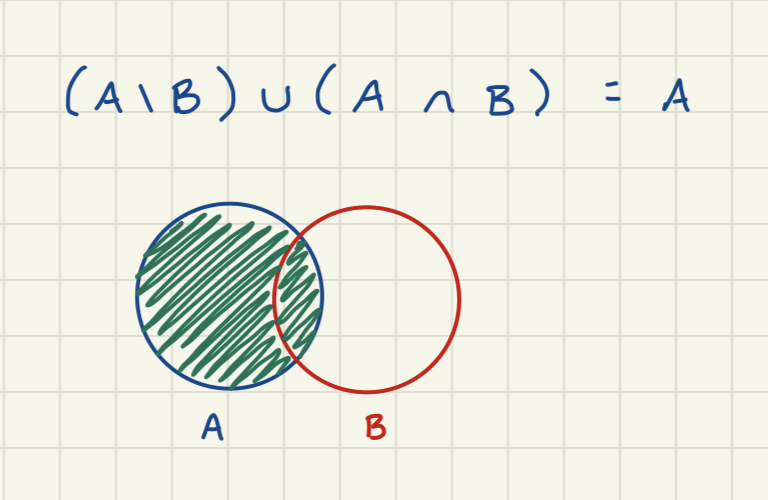

### part b
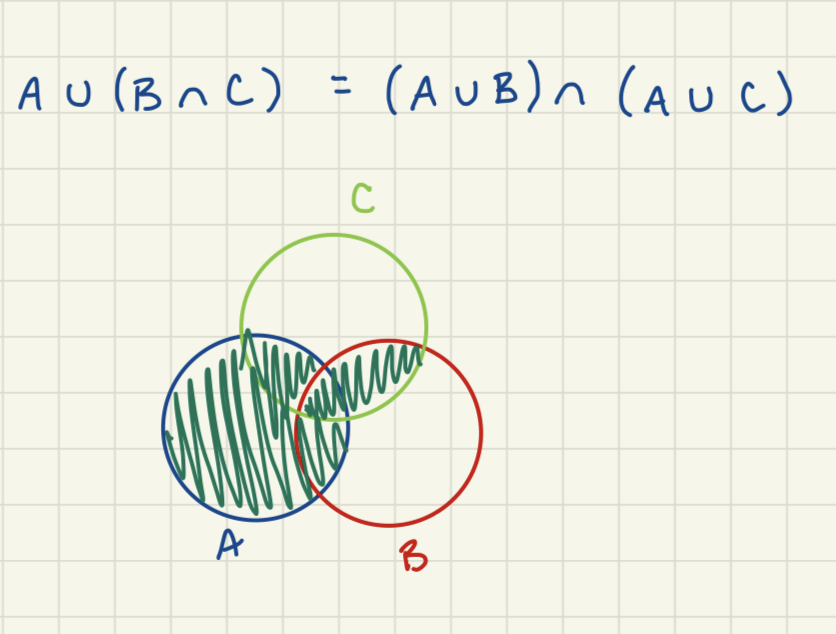

### part c
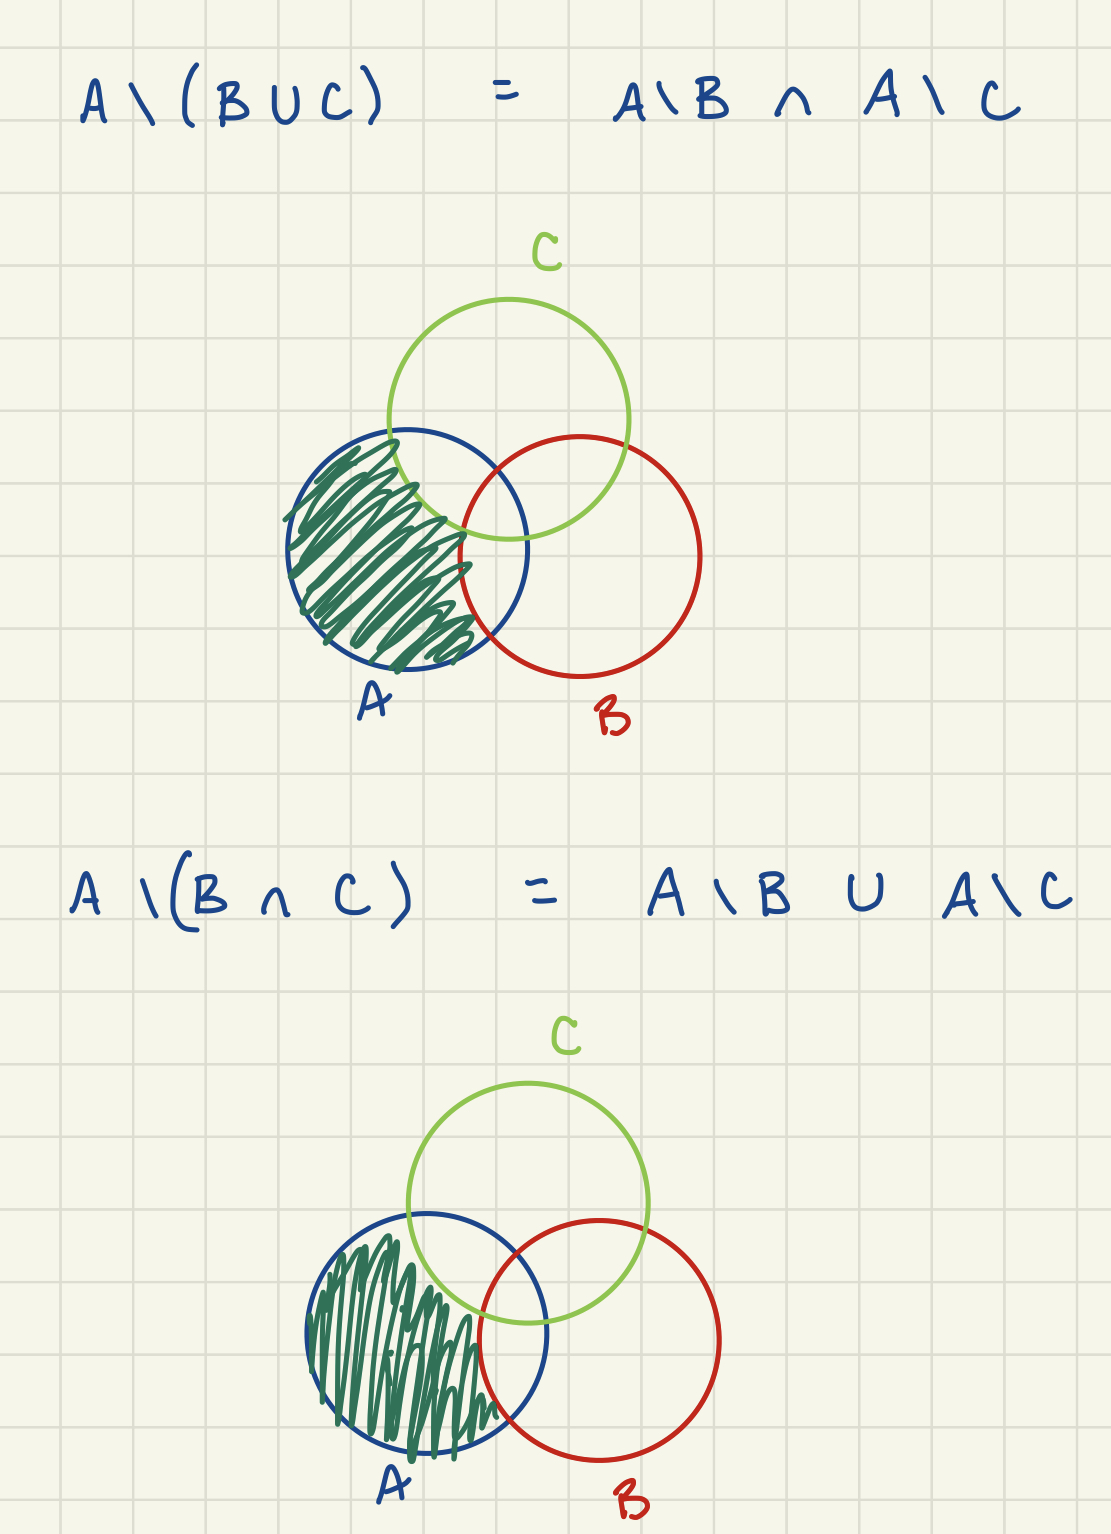

### part d
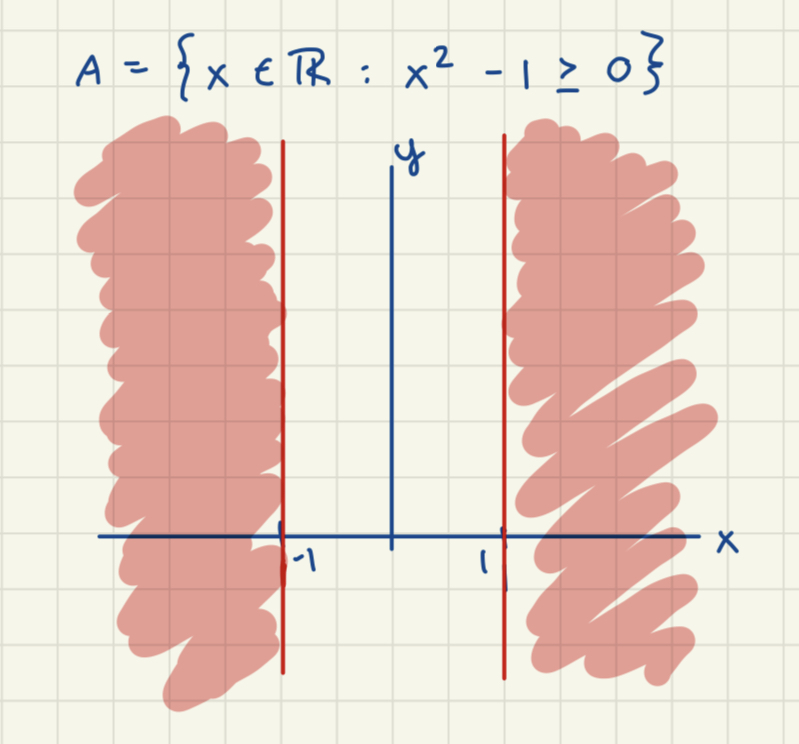
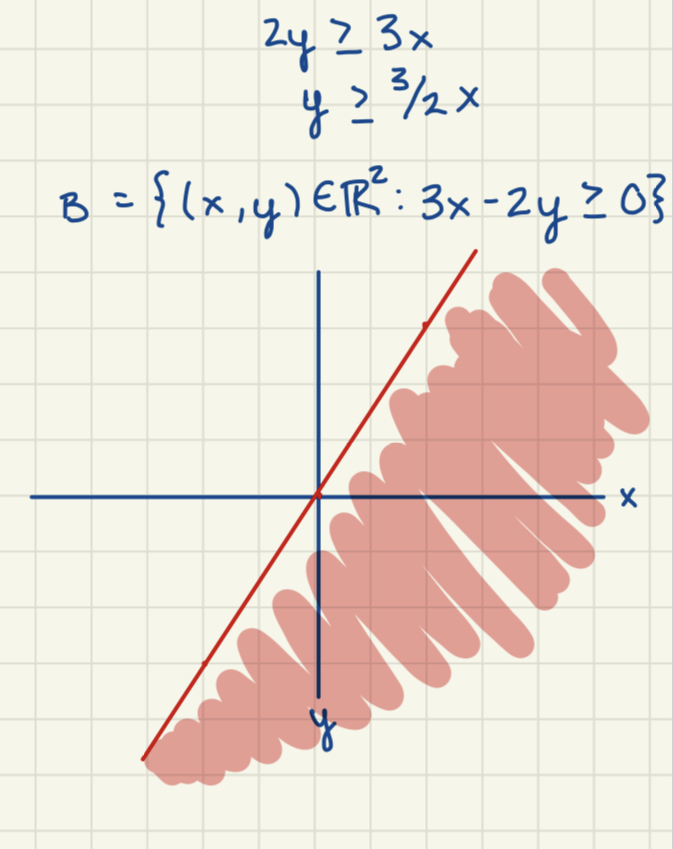
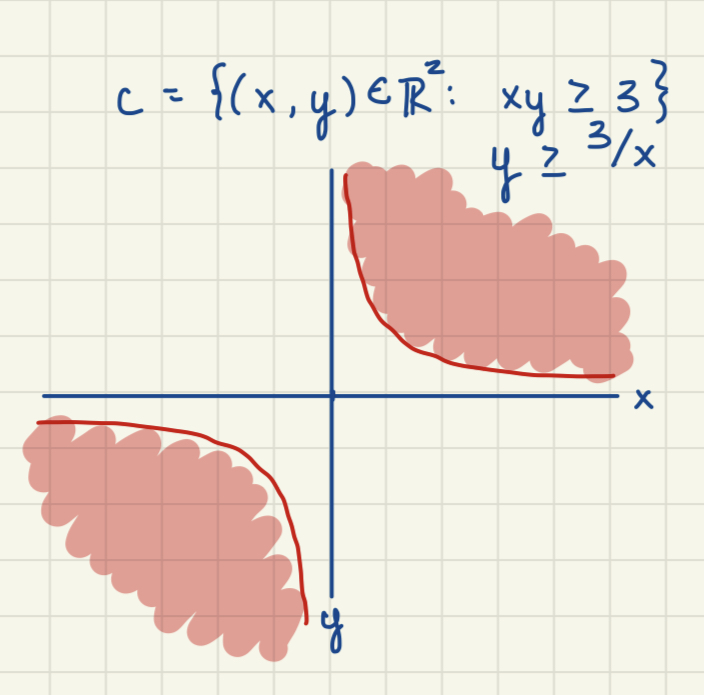
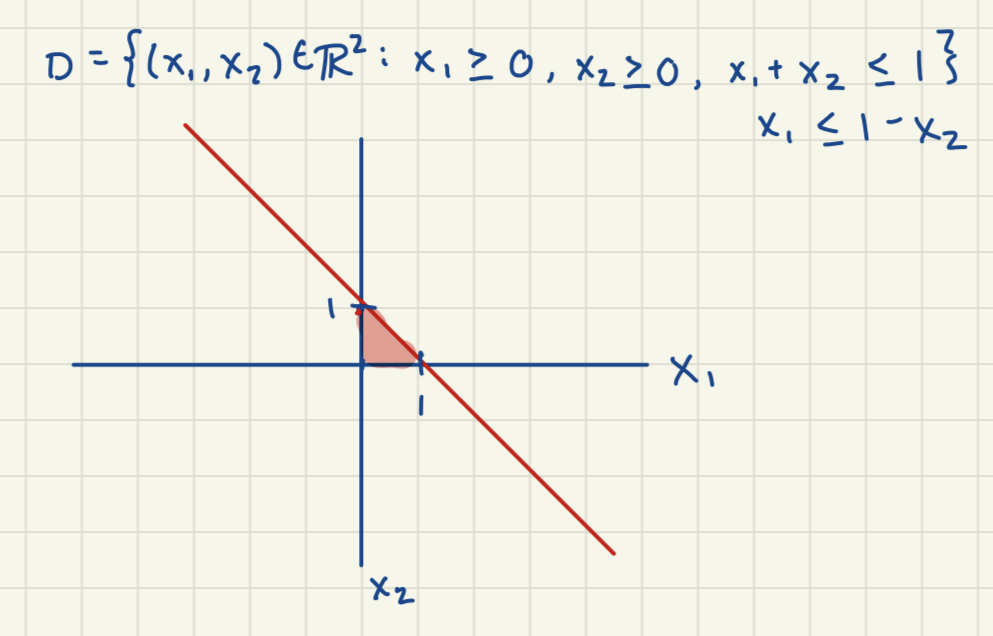

### part e
$\mathcal{P}(A)$ = {{}, {1}, {2}, {3}, {1,2}, {1,3}, {2,3}, {1,2,3}}

### 2. Probability space basics:

- What are the outcomes for rolling a fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

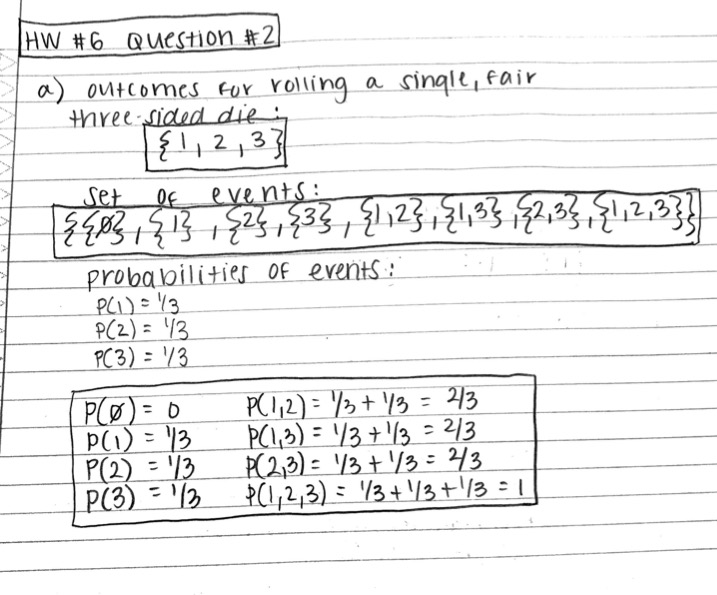

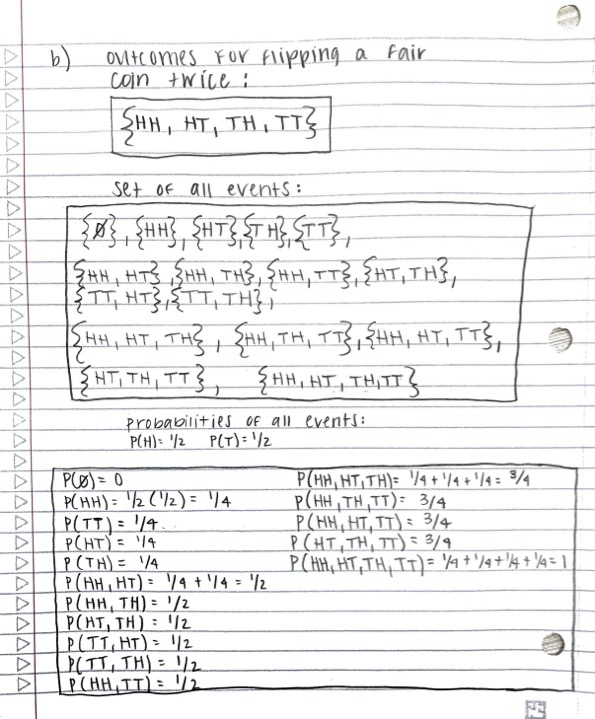

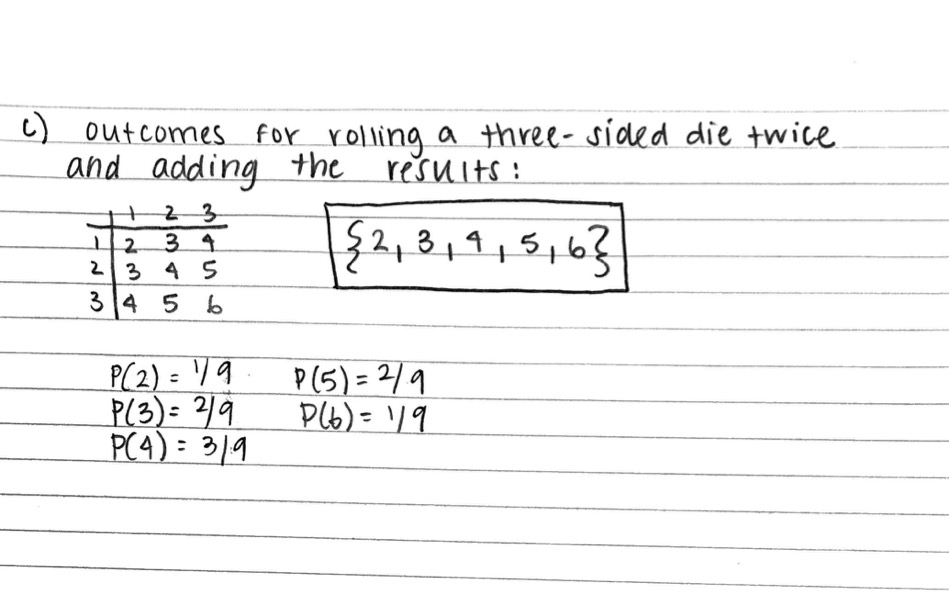

There are 32 possible events when you roll a three-sided die twice and add the results together. We know this because there are 5 outcomes, rolling a sum from the set {2,3,4,5,6}, and $2^{5}=32$. To determine what events are in the set, they follow a sort of pattern starting from the empty set and ending with the full set. The pattern starts with the empty set (1 event), then we look at the events of rolling a sum of 2, 3, 4, 5, or 6 (5 events). Then we look at groups of 2, like rolling a sum of 2 or 3, 2 or 4,..., 5 or 6, which gives us our next 10 events. Then we look at groups of 3, such as rolling a sum of (2, 3, or 4), (2, 3, or 5),...,(4, 5, or 6), which are our next 10 events. After, we look at groups of 4, such as rolling a sum of (2, 3, 4, or 5), (2, 3, 4, or 6),...,(3, 4, 5, or 6), which are the next 5 events. Our last event is then the full set, which is rolling a (2, 3, 4, 5, or 6), which is 1 event. Totalling up all of these, we get 32 possible events.

The probability of all the possible events follows a similar pattern to the one described above. The empty set has a probability of 0 and the full set, {2,3,4,5,6} has a probability of 1. The probability of rolling a sum of 2 is 1/9, 3 is 2/9, 4 is 1/3, 5 is 2/9, and 6 is 1/9. To find the probability of the groups of 2 listed above, for example (2 or 3), you just add the proability of rolling a sum of 2 plus rolling a sum of 3, which is 1/9 + 2/9 = 1/3. You then do this for all of the sums listed in your event to get the total probability of that event. So in our groups of 3 for example, (2, 3, or 4), we get 1/9 + 2/9 + 1/3 = 2/3. The other probabilities can be found following the same steps.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

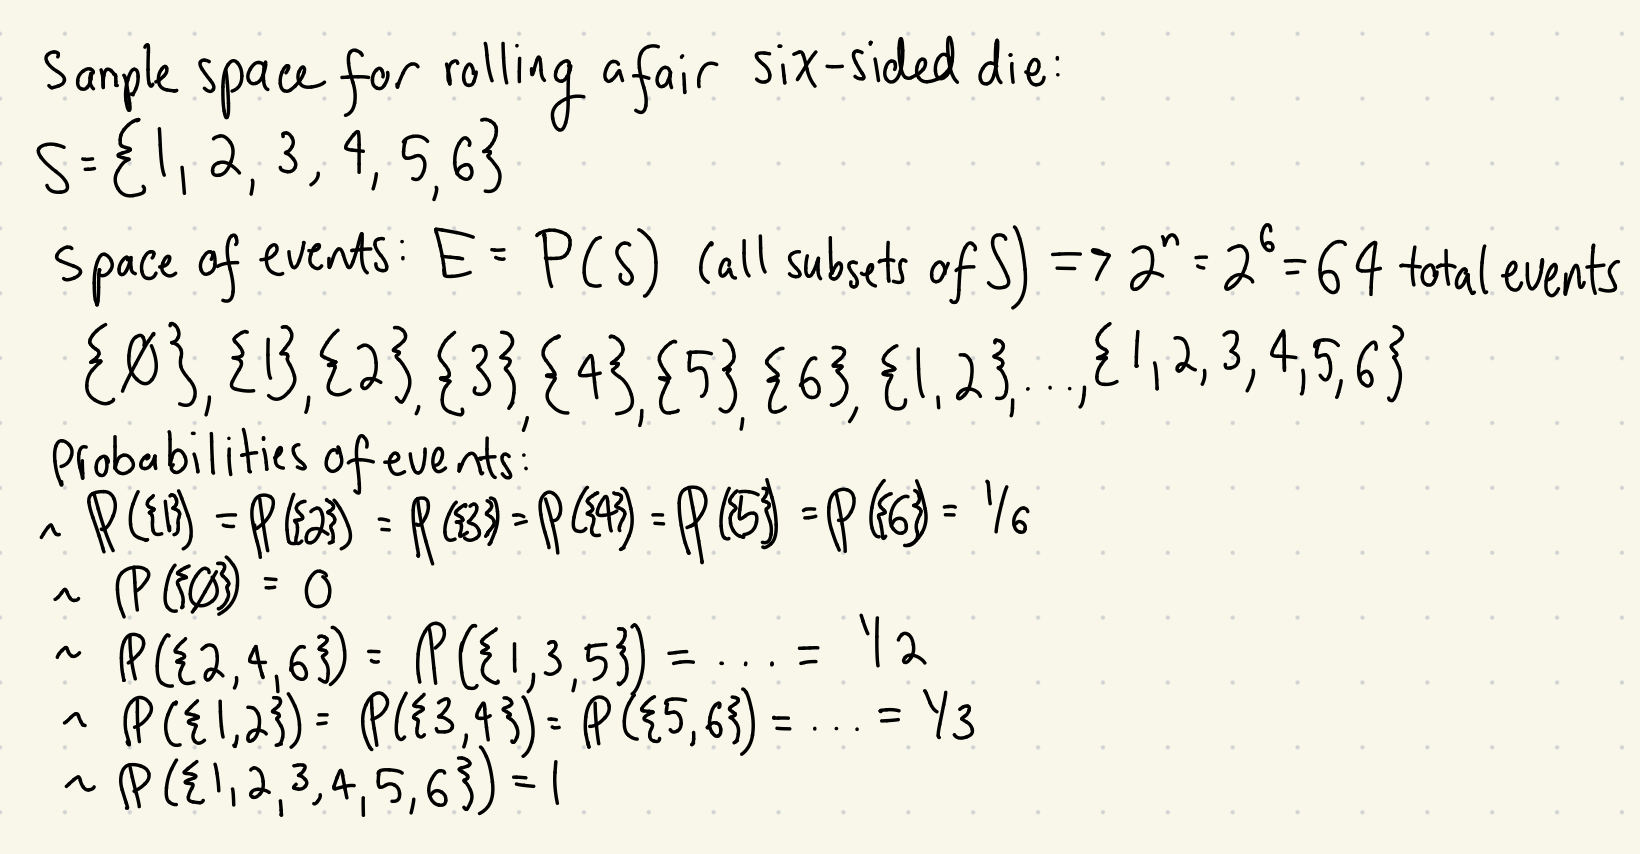

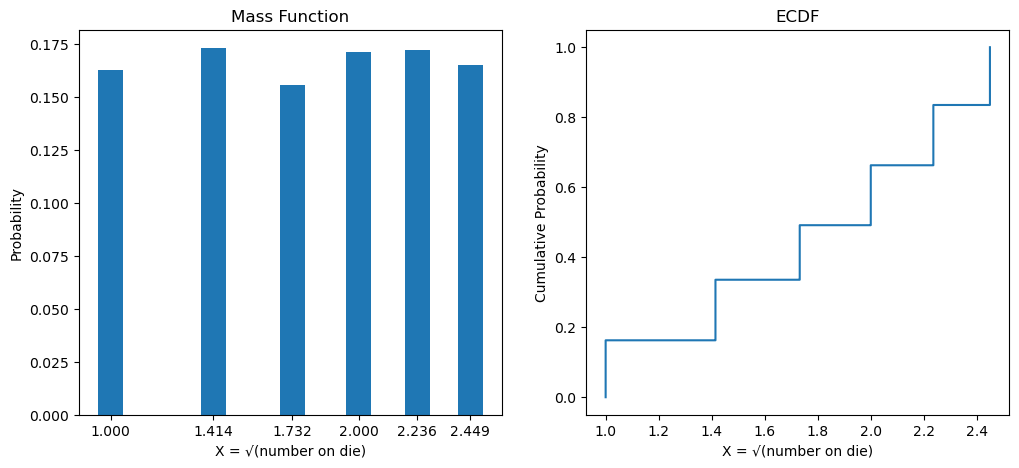

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 5000
rolls = np.random.randint(1, 7, size=n)

X = np.sqrt(rolls)

pmf = pd.Series(X).value_counts(normalize=True).sort_index()

X_sorted = np.sort(X)
ecdf = np.arange(1, n + 1) / n

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(pmf.index, pmf.values, width=0.1)
plt.title("Mass Function")
plt.xlabel("X = √(number on die)")
plt.ylabel("Probability")
plt.xticks(pmf.index)

plt.subplot(1, 2, 2)
plt.step(X_sorted, ecdf, where='post')
plt.title("ECDF")
plt.xlabel("X = √(number on die)")
plt.ylabel("Cumulative Probability")
plt.show()

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.

![alt text](logisticdist.png)

In [78]:
from scipy.stats import logistic

In [79]:
# Support of logistic distribution:
lb, ub = logistic.support()
lb, ub

(np.float64(-inf), np.float64(inf))

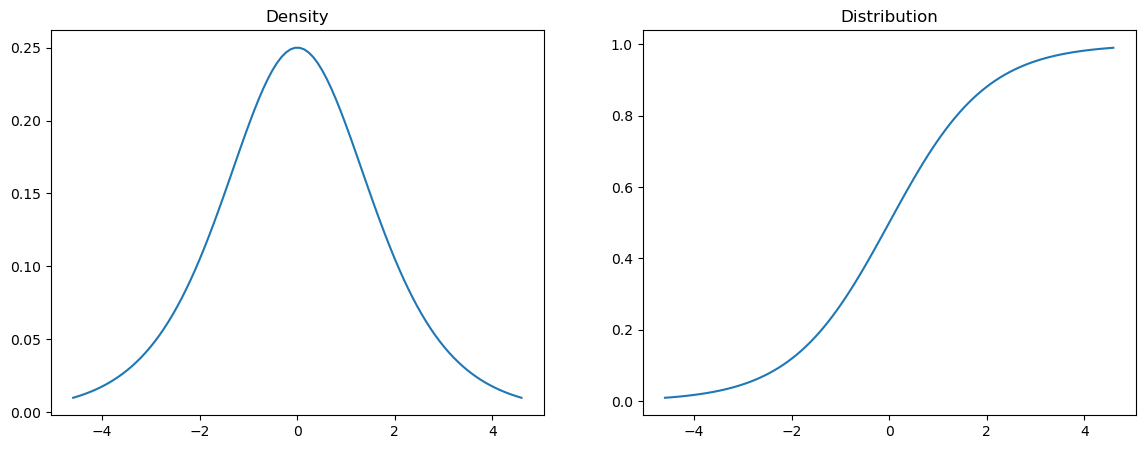

In [80]:
grid = np.linspace(logistic.ppf(0.01),
                   logistic.ppf(0.99), 100)

# Plot the density and distribution
pdf = logistic.pdf(grid)
cdf = logistic.cdf(grid)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.lineplot(x = grid, y = pdf, ax = axes[0])
axes[0].set_title('Density')
sns.lineplot(x = grid, y = cdf, ax = axes[1])
axes[1].set_title('Distribution')
plt.show()

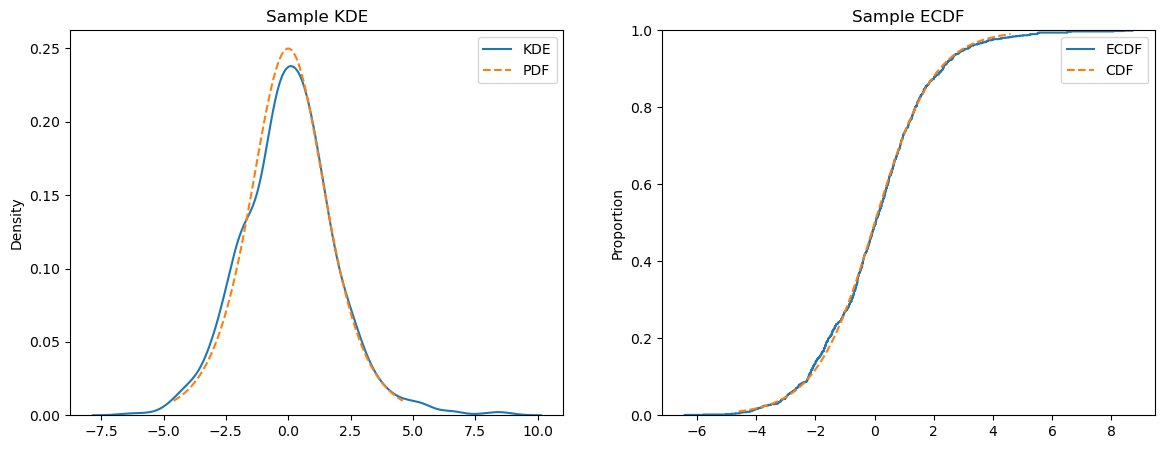

In [81]:
# Sample of 1000 draws
sample = logistic.rvs(size = 1000)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.kdeplot(x = sample, ax = axes[0], label = 'KDE')
sns.lineplot(x = grid, y = pdf, ax = axes[0], label = 'PDF', linestyle = '--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x = sample, ax = axes[1], label = 'ECDF')
sns.lineplot(x = grid, y = cdf, ax = axes[1], label = 'CDF', linestyle = '--')
axes[1].set_title('Sample ECDF')
plt.show()


- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

![alt text](exponentialdist.png)

In [82]:
from scipy.stats import expon

In [83]:
# Support of the exponential distribution:
lb, ub = expon.support()
lb, ub

(np.float64(0.0), np.float64(inf))

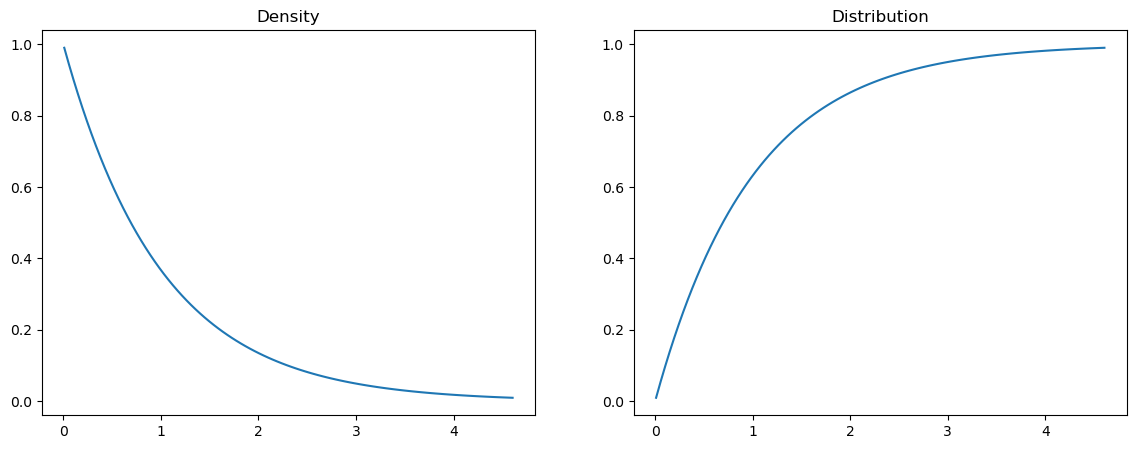

In [84]:
grid = np.linspace(expon.ppf(0.01),
                   expon.ppf(0.99), 100)

# Plot the density and distribution
pdf = expon.pdf(grid)
cdf = expon.cdf(grid)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.lineplot(x = grid, y = pdf, ax = axes[0])
axes[0].set_title('Density')
sns.lineplot(x = grid, y = cdf, ax = axes[1])
axes[1].set_title('Distribution')
plt.show()

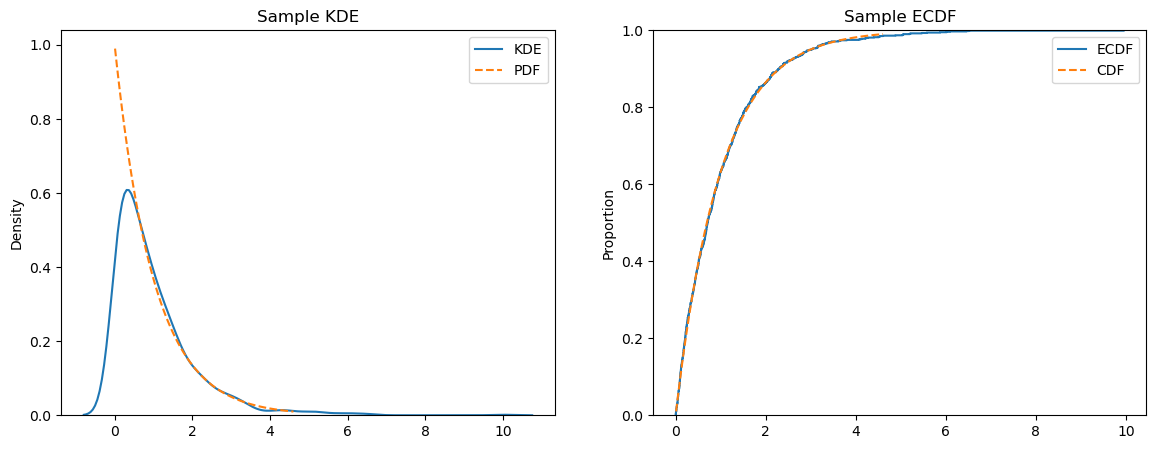

In [85]:
# Sample of 1000 draws
sample = expon.rvs(size = 1000)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.kdeplot(x = sample, ax = axes[0], label = 'KDE')
sns.lineplot(x = grid, y = pdf, ax = axes[0], label = 'PDF', linestyle = '--')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x = sample, ax = axes[1], label = 'ECDF')
sns.lineplot(x = grid, y = cdf, ax = axes[1], label = 'CDF', linestyle = '--')
axes[1].set_title('Sample ECDF')
plt.show()


- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?

In [86]:
from scipy.stats import nbinom

In [ ]:
# Support of the negative binomial distribution:
n, p = 5, 0.5
lb, ub = nbinom.support(n, p)
lb, ub


(np.int64(0), np.float64(inf))

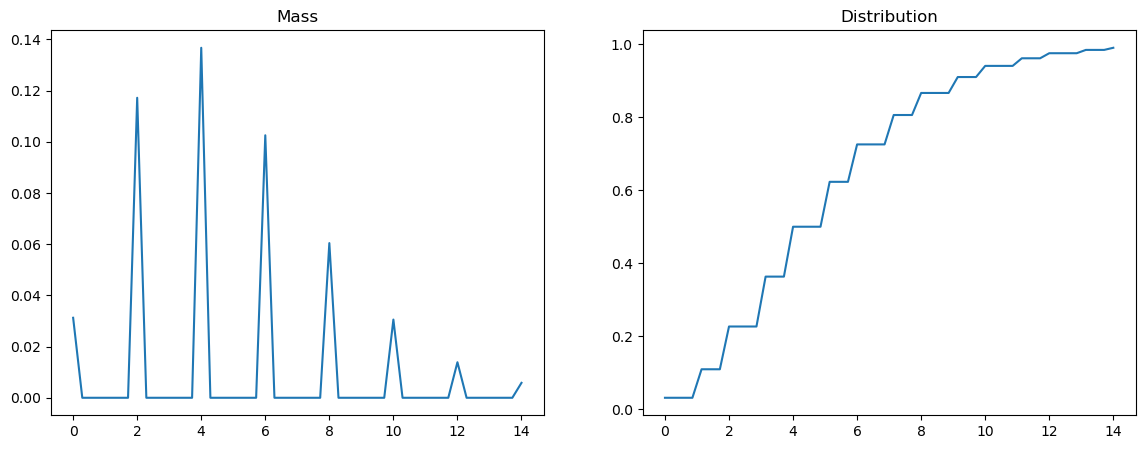

In [103]:
grid = np.linspace(nbinom.ppf(0.01, n, p),
                   nbinom.ppf(0.99, n, p))

# Plot the probability mass function and distribution
pmf = nbinom.pmf(grid, n, p)
cdf = nbinom.cdf(grid, n, p)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.lineplot(x = grid, y = pmf, ax = axes[0]) # or sns.barplot(x = grid, y = pmf, ax = axes[0])
axes[0].set_title('Mass')
sns.lineplot(x = grid, y = cdf, ax = axes[1])
axes[1].set_title('Distribution')
plt.show()

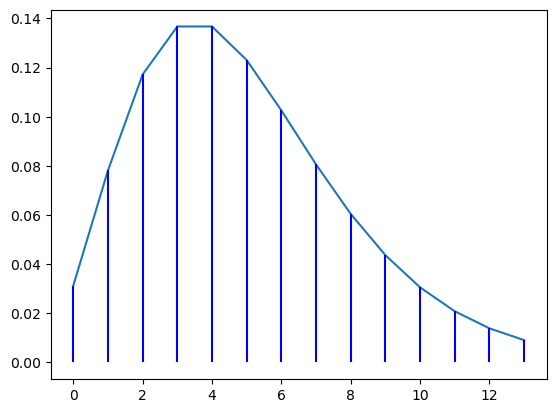

In [89]:
# A nicer picture of the probability mass function
fig, ax = plt.subplots(1, 1)
x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b')

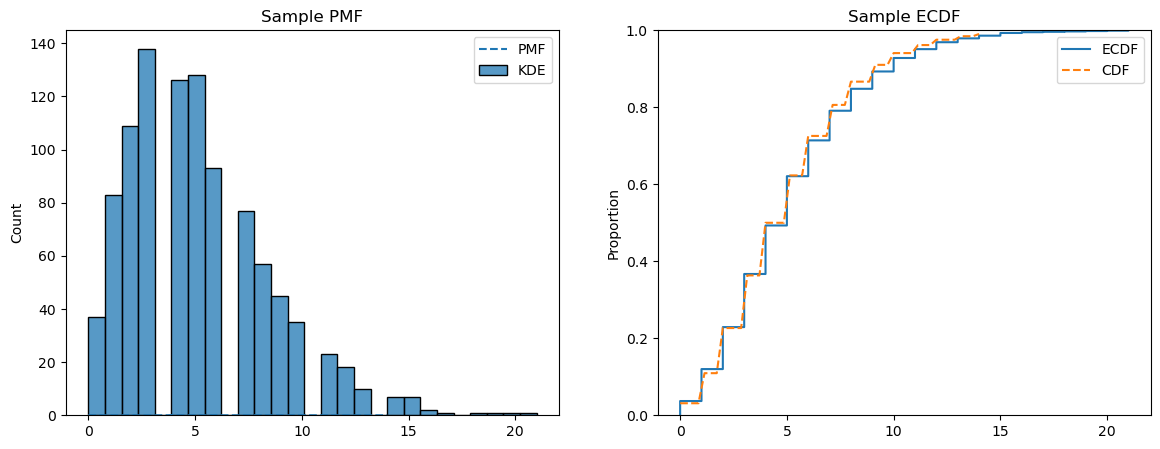

In [101]:
# Sample of 1000 draws
sample = nbinom.rvs(n, p, size = 1000)

fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.histplot(x = sample, ax = axes[0], label = 'KDE')
sns.lineplot(x = grid, y = pmf, ax = axes[0], label = 'PMF', linestyle = '--')
axes[0].set_title('Sample PMF')
sns.ecdfplot(x = sample, ax = axes[1], label = 'ECDF')
sns.lineplot(x = grid, y = cdf, ax = axes[1], label = 'CDF', linestyle = '--')
axes[1].set_title('Sample ECDF')
plt.show()

- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


In [106]:
# When n = 1, the multinomial distribution simplifies to the categorical distribution
from scipy.stats import multinomial